# Two ways to solve m and c
1. closed form: direct formula : lin reg in sklearn use this
2. Gradient Descent: best for higher dimension: SGDregresor use this

### Gradient Descent
1. It is best as time complexity on big data set is around O(n^3) and require to much space also hence while taking Inverse and using Closed Form 
2. Hence GD is best in comparison of Closed Form

## Closed
1. m = cov(X,Y)/var(X)
2. b = mean_y - mean_x*m
3. Check Notes for more formulas

### Custom LR

In [218]:
import numpy as np
class My_LR:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,xtrain,ytrain):
        
        xtrain = np.array(xtrain)
        ytrain = np.array(ytrain).reshape(len(ytrain),1)

        self.m = np.dot((xtrain - np.mean(xtrain)).T, (ytrain - np.mean(ytrain))) / sum(pow( xtrain - np.mean(xtrain) , 2 ))
        self.b = np.mean(ytrain) - self.m * np.mean(xtrain)

    def predict(self,xtest):
        xtest = np.array(xtest)
        return self.m * xtest + self.b

In [219]:
import pandas as pd
df = pd.read_csv('placement.csv')

In [220]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,0:1],df.iloc[:,-1],test_size=0.3)

In [221]:
from sklearn.metrics import r2_score
lr = My_LR()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
r2_score(ytest,ypred)

0.8294731322613826

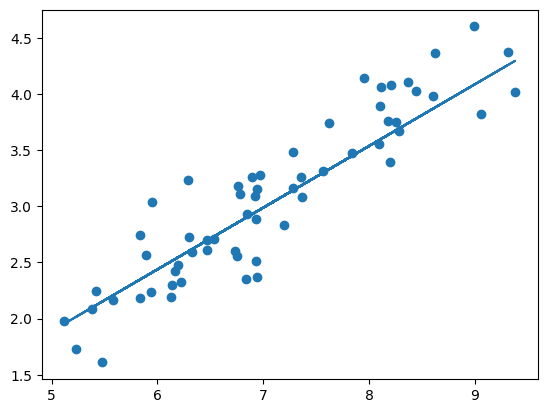

In [222]:
import matplotlib.pyplot as plt
plt.scatter(xtest,ytest)
plt.plot(xtest,lr.predict(xtest))
plt.show()

In [233]:
import numpy as np
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
pd.DataFrame(X,y).head()

,0,1,2,3,4,5,6,7,8,9
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [224]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(X,y,test_size=0.3)

In [225]:
import numpy as np
class My_LR_General:
    def __init__(self):
        self.coeff_ = None
        self.intercept_ = None
        
    def fit(self,xtrain,ytrain):
        xtrain = np.insert(xtrain,0,1,axis=1)  # adding 1's column 
        # W = (X.T * X)^(-1) * X.T * Y
        temp = np.linalg.inv(np.dot(xtrain.T,xtrain)).dot(xtrain.T).dot(ytrain)
        self.coeff_ = temp[1:].reshape(xtrain.shape[1] - 1,1)
        self.intercept_ = temp[0]

    def predict(self,xtest):
        return np.dot(xtest,self.coeff_) + self.intercept_
    

In [226]:
multiple_lr = My_LR_General()
multiple_lr.fit(xtrain1,ytrain1)
multiple_lr.coeff_

array([[   5.7673229 ],
       [-209.76331595],
       [ 562.14695062],
       [ 335.58483129],
       [-657.12313052],
       [ 344.37173393],
       [  44.52837994],
       [ 145.52798681],
       [ 674.42066044],
       [  33.5076685 ]])

In [227]:
multiple_lr.intercept_

152.59315725480806

In [228]:
ypred1 = multiple_lr.predict(xtest1)

In [229]:
from sklearn.metrics import r2_score
r2_score(ytest1,ypred1)

0.5027054130191577

## MR Applied for LR

In [230]:
mr = My_LR_General()
mr.fit(xtrain,ytrain)
yp = mr.predict(xtest)
r2_score(ytest,yp)

0.8294731322613804

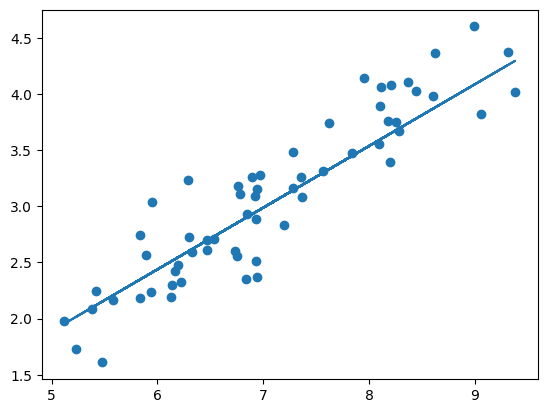

In [231]:
plt.scatter(xtest,ytest)
plt.plot(xtest,yp)
plt.show()